In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


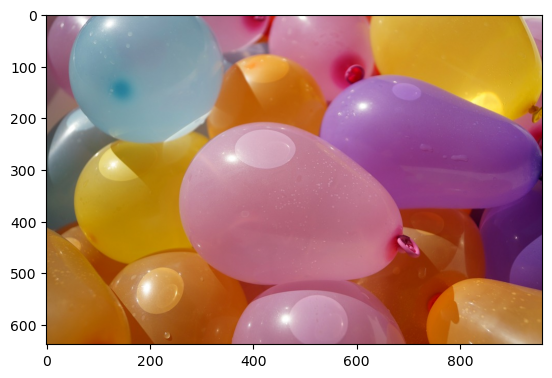

In [2]:
%matplotlib inline

# Read in the image
image = cv2.imread('water_balloons.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

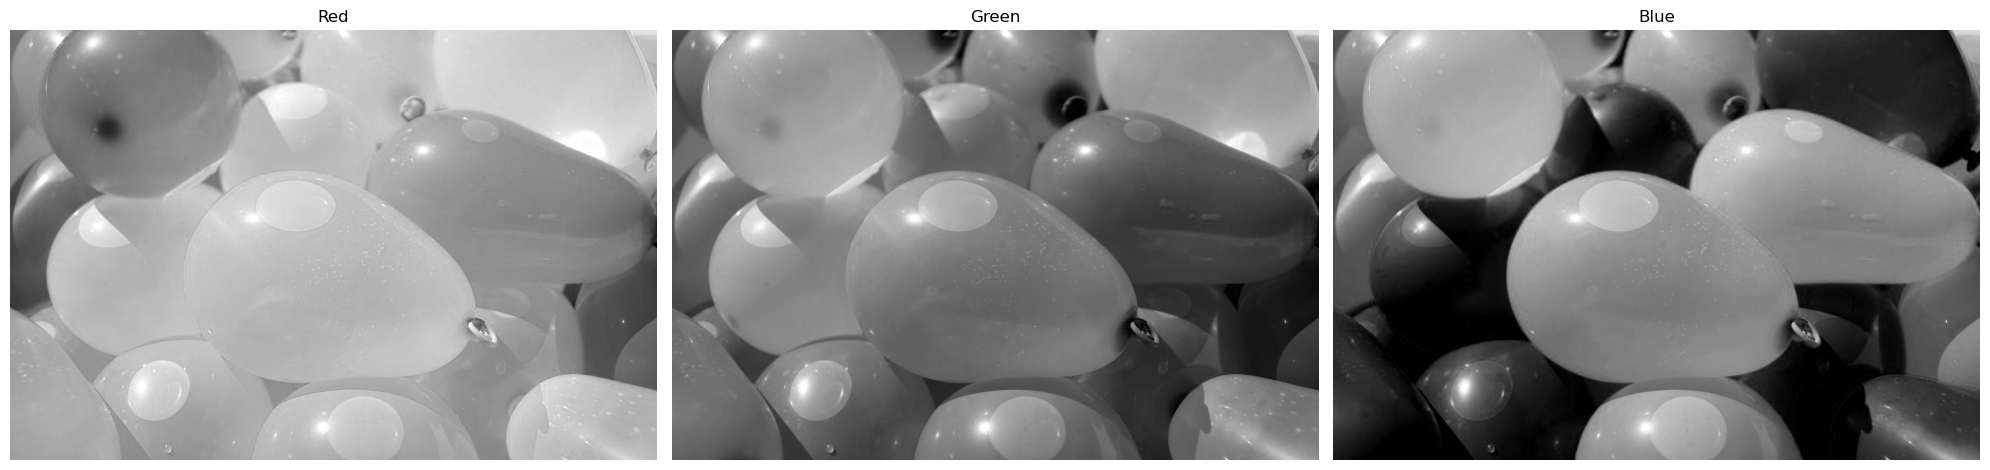

In [5]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]

fig, axes = plt.subplots(1, 3, figsize=(20,10))  # 1 row, 3 columns
titles = ['Red', 'Green', 'Blue']
channels = [r, g, b]

for ax, ch, title in zip(axes, channels, titles):
    ax.set_title(title)
    ax.imshow(ch, cmap='gray')
    ax.axis('off')  # hides axis lines/numbers for cleaner view

plt.tight_layout()
plt.show()


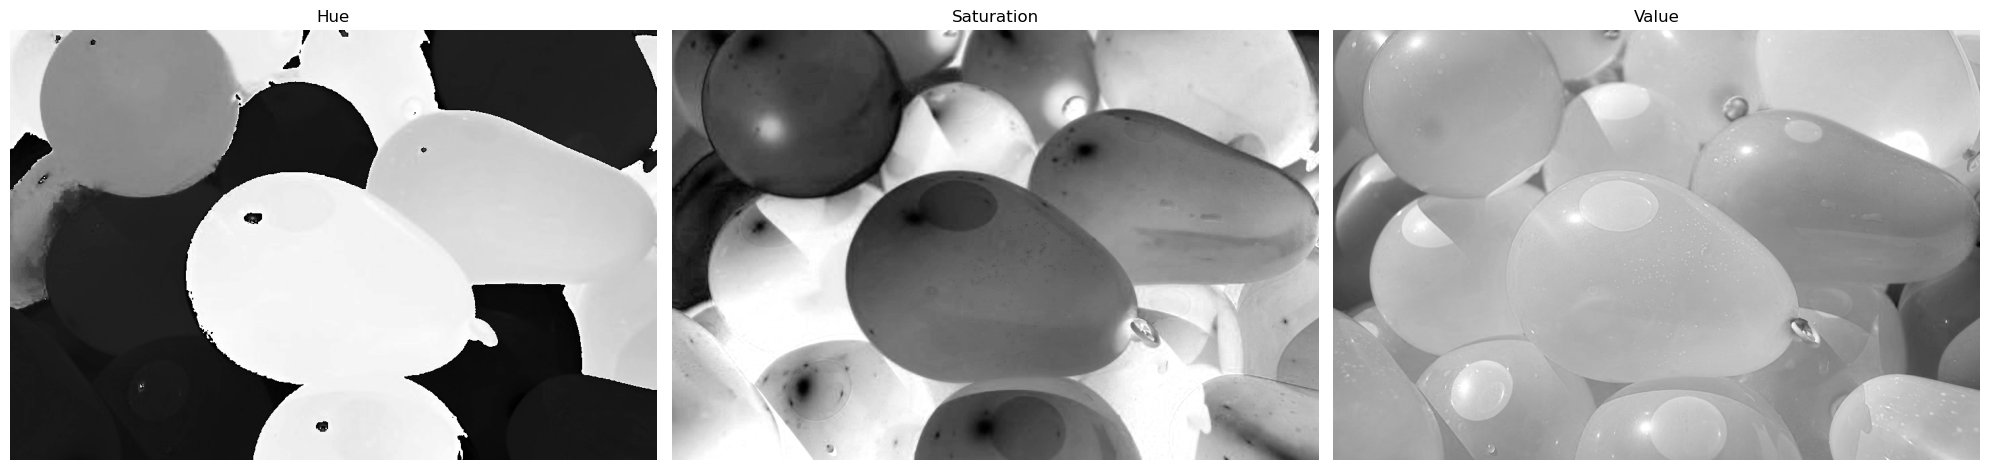

In [7]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

# Hue with color map
ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')
ax1.axis('off')

# Saturation in grayscale
ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')
ax2.axis('off')

# Value in grayscale
ax3.set_title('Value')
ax3.imshow(v, cmap='gray')
ax3.axis('off')

plt.tight_layout()
plt.show()


### Define pink and hue selection thresholds

In [8]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

In [9]:
# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])

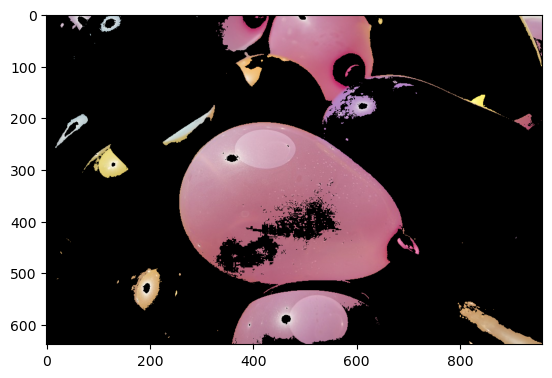

In [10]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# mask the image
masked_image = np.copy(image)
masked_image[mask_rgb==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)
plt.show()


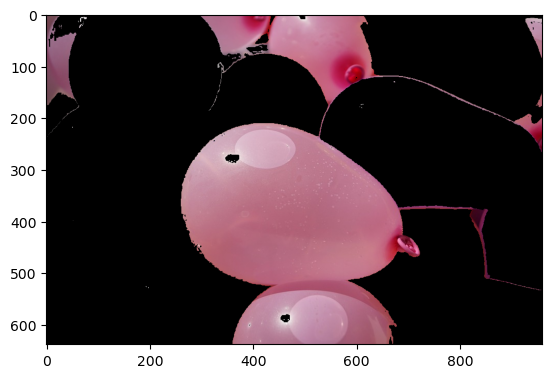

In [11]:
# Now try HSV!

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image = np.copy(image)
masked_image[mask_hsv==0] = [0,0,0]

# Vizualize the mask
plt.imshow(masked_image)
plt.show()
